In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2 as cv
import torch
from torchvision import transforms
from PIL import Image
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [13]:
train_data = "data/train"
val_data = "data/valid"

classes = sorted(os.listdir(train_data))

counts = []
for c in classes:
    counts.append(len(os.listdir(os.path.join(train_data, c))))

df = pd.DataFrame({"Class": classes, "Total_Count": counts})
df.head(10)

,Class,Total_Count
0,Apple___Apple_scab,2016
1,Apple___Black_rot,1987
2,Apple___Cedar_apple_rust,1760
3,Apple___healthy,2008
4,Blueberry___healthy,1816
5,Cherry_(including_sour)___Powdery_mildew,1683
6,Cherry_(including_sour)___healthy,1826
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,1642
8,Corn_(maize)___Common_rust_,1907
9,Corn_(maize)___Northern_Leaf_Blight,1908


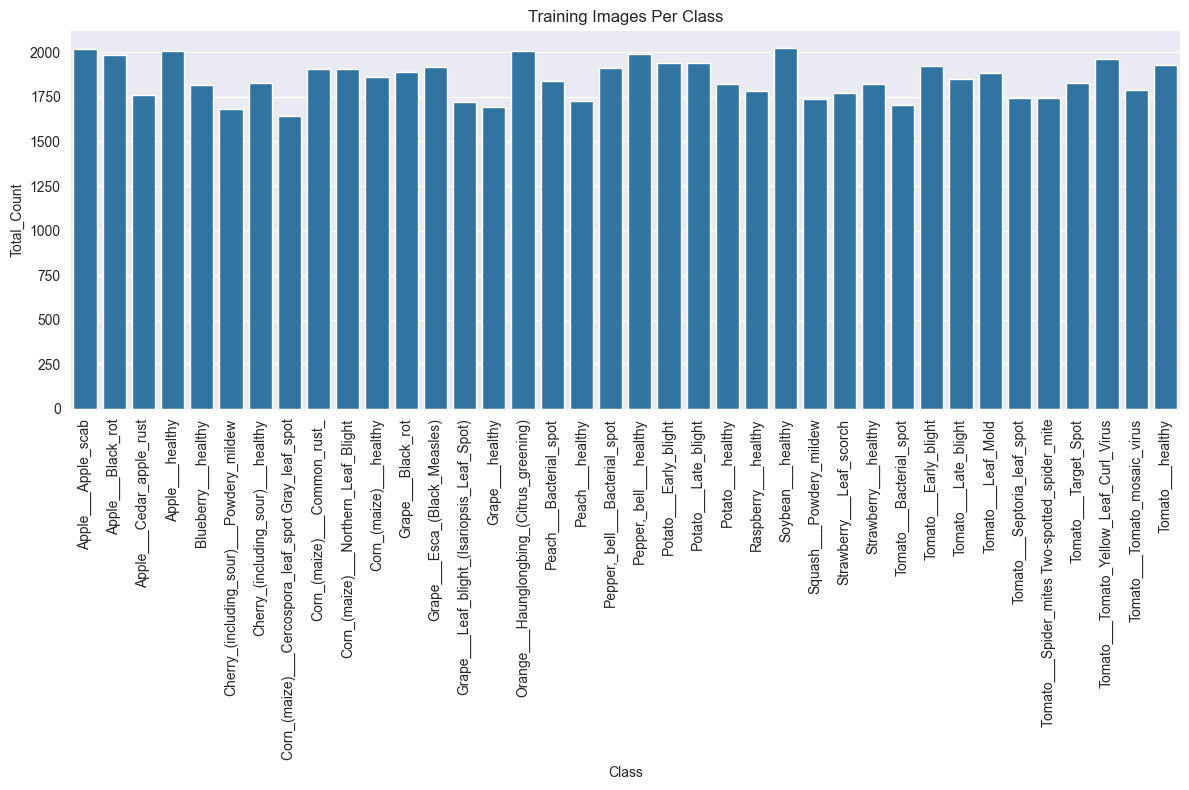

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(
    data = df,
    x="Class",
    y="Total_Count"
)
plt.title("Training Images Per Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

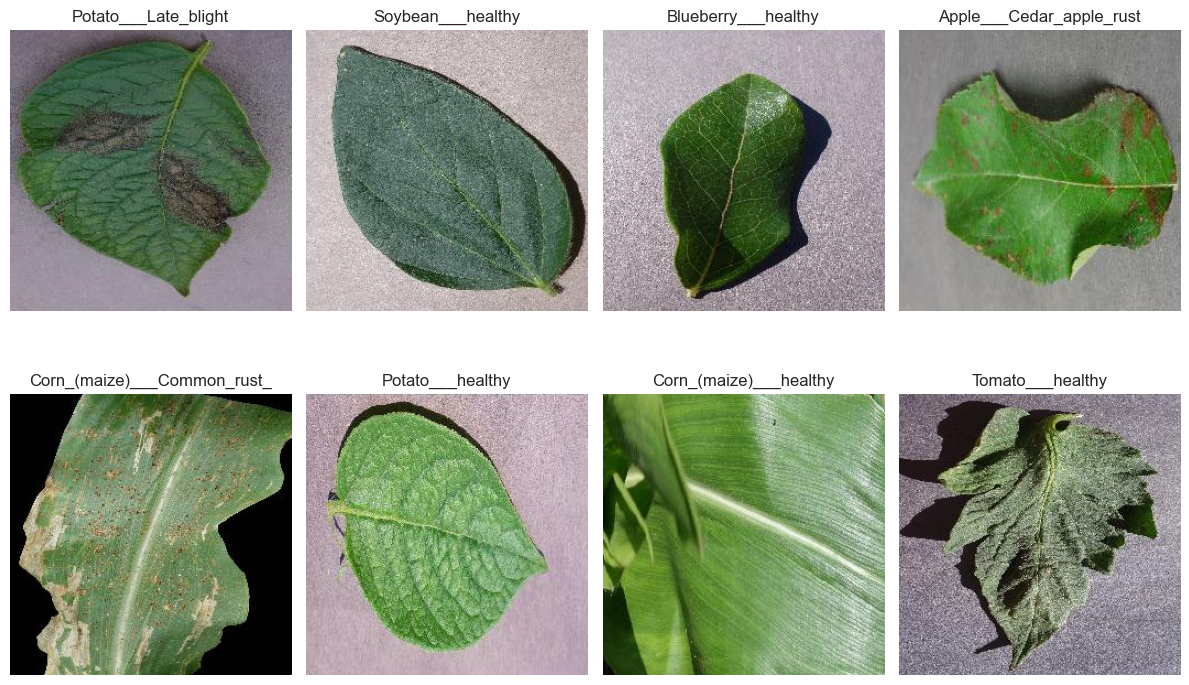

In [15]:
plt.figure(figsize=(12,8))

for i in range(8):
    cls = random.choice(classes)
    img_file = random.choice(os.listdir(os.path.join(train_data, cls)))
    img = cv.imread(os.path.join(train_data, cls, img_file))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

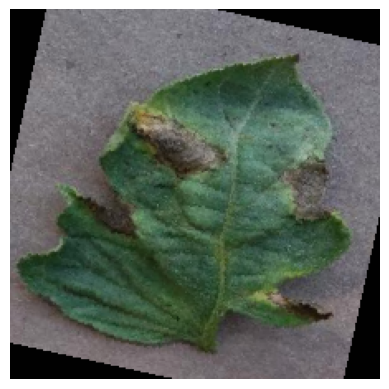

In [16]:
t = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])


img = Image.open("data/train/Tomato___Early_blight/0abc57ec-7f3b-482a-8579-21f3b2fb780b___RS_Erly.B 7609.JPG")
aug_img = t(img)

plt.imshow(aug_img.permute(1,2,0))
plt.axis("off")

In [17]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [18]:
train_ds = ImageFolder("data/train", transform=train_transform)
val_ds = ImageFolder("data/valid", transform=val_transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader= DataLoader(val_ds, batch_size=32, shuffle=False)

print("Classes: ", train_ds.classes)
print("Number of Classes: ", len(train_ds.classes))

Classes:  ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato__